# Introdução à estatística com python

In [1]:
!pip install kaggle
!pip install scipy

In [2]:
import pandas as pd
import kaggle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Link do dataset: https://www.kaggle.com/datasets/devansodariya/student-performance-data
É um dataset referente a performance dos estudantes

Comando para baixar o dataset:

In [3]:
#!kaggle datasets download -d devansodariya/student-performance-data

In [4]:
df = pd.read_csv('student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info() # Podemos ver que esse dataset não possui valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [21]:
df.isnull().sum() # Melhor forma de visualizar dados nulos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# Sumário estatistico simplificado
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


Aprofundando o Conceito de Frequências

Frequência Absoluta (Contagem): Refere-se à quantidade de vezes que um determinado valor de uma variável ocorre dentro de um conjunto de dados.

Frequência Relativa: Indica a proporção ou a fração do total de ocorrências de um valor específico em relação ao número total de observações ou ao total da amostra.

Frequência Absoluta Acumulada: É o  acúmulo das frequências dos níveis anteriores.

Frequência Relativa Acumulada: É a proporção acumulada, dado o acúmulo das proporções dos níveis anteriores.

In [7]:
# Frequência absoluta
fa = df['sex'].value_counts()
print('Frequência absoluta')
fa

Frequência absoluta


sex
F    208
M    187
Name: count, dtype: int64

In [8]:
# Frequência relativa
fr = df['sex'].value_counts(normalize=True) # O normalize retorna as frequências relativas dos valores
print('Frequência relativa')
print(fr)

# Ou também mostrando em porcentagem
frporcento = (fr * 100).round(2)
print('Em porcentagem:')
print(frporcento)

Frequência relativa
sex
F    0.526582
M    0.473418
Name: proportion, dtype: float64
Em porcentagem:
sex
F    52.66
M    47.34
Name: proportion, dtype: float64


Logo temos a seguinte tabela

In [9]:
tabela_frequencia = pd.DataFrame({
    "fa": fa,
    'fr': frporcento
}).reset_index()

tabela_frequencia.columns = ['Sexo', 'FA', 'FR']

tabela_frequencia

,Sexo,FA,FR
0,F,208,52.66
1,M,187,47.34


In [10]:
# Frequência absoluta acumulada
tabela_frequencia['FAA'] = tabela_frequencia['FA'].cumsum()
tabela_frequencia

,Sexo,FA,FR,FAA
0,F,208,52.66,208
1,M,187,47.34,395


In [11]:
# Frequência relativa acumulada
tabela_frequencia['FRA'] = (tabela_frequencia['FR'] / 100).cumsum()
tabela_frequencia

,Sexo,FA,FR,FAA,FRA
0,F,208,52.66,208,0.5266
1,M,187,47.34,395,1.0000


### Utilizando conhecimentos estatisticos para analisar as idades

Medidas de tendências central

- Média:
A média é uma medida de tendência central que representa o ponto central de um conjunto de dados. Ela é calculada somando todos os valores do conjunto de dados e dividindo pelo número total de observações. É importante notar que a média é sensível a valores extremos, ou seja, valores muito grandes ou muito pequenos podem distorcer a média.

- Mediana:
A mediana é outra medida de tendência central que representa o valor central de um conjunto de dados ordenado.
Para calcular a mediana, primeiro ordenamos os dados em ordem crescente ou decrescente e então encontramos o valor que está no meio do conjunto de dados.
Se houver um número ímpar de observações, a mediana é o valor que está exatamente no meio. Se houver um número par de observações, a mediana é a média dos dois valores do meio.

- Moda:
A moda é a medida de tendência central que representa o valor que aparece com mais frequência em um conjunto de dados. Pode haver uma única moda (quando apenas um valor tem a maior frequência) ou várias modas (quando mais de um valor tem a mesma maior frequência).

In [12]:
# Média
media = df['age'].mean()
print(f'Média: {media.round(2)}')

Média: 16.7


In [13]:
# Mediana
mediana = df['age'].median()
print(f'Mediana: {mediana}')

Mediana: 17.0


In [14]:
# Moda
moda = df['age'].mode()
print(f'Moda: {moda[0]}')

Moda: 16


### Medidas de dispersão

- Intervalo:
O intervalo é uma medida de dispersão que representa a diferença entre o maior e o menor valor em um conjunto de dados.
O intervalo fornece uma ideia geral da dispersão dos dados, mas é sensível a valores extremos e pode não ser uma medida robusta de variabilidade em conjuntos de dados com valores discrepantes.

- Variância (var):
A variância é uma medida de dispersão que representa a média dos quadrados das diferenças entre cada valor e a média do conjunto de dados.
É calculada subtraindo-se cada valor da média, elevando ao quadrado o resultado e tirando a média desses quadrados.
A variância fornece uma medida de quão distantes os valores estão da média. Valores mais altos de variância indicam uma dispersão maior em torno da média.

- Desvio padrão (std):
O desvio padrão é outra medida de dispersão que representa a raiz quadrada da variância.
Ele fornece uma medida de dispersão dos dados em torno da média de forma mais intuitiva, uma vez que está na mesma unidade dos dados originais.
Um desvio padrão maior indica uma dispersão maior dos dados em relação à média, enquanto um desvio padrão menor indica que os dados estão mais próximos da média.

In [15]:
# Intervalo
min_idades = df['age'].min()

max_idades = df['age'].max()

print(f'Intervalo:\nmin: {min_idades} - max: {max_idades}')

Intervalo:
min: 15 - max: 22


In [16]:
# Variância
variancia = df['age'].var()
print(f'Variância: {variancia.round(2)}')

Variância: 1.63


In [17]:
# Desvio padrão
desvio_padrao = df['age'].std()
print(f'Desvio padrão: {desvio_padrao.round(2)}')

Desvio padrão: 1.28


Analisando por faixas de valores

In [18]:
agrupando_idade = df['age'].value_counts(bins=5)
agrupando_idade.sort_index()

(14.992, 16.4]    186
(16.4, 17.8]       98
(17.8, 19.2]      106
(19.2, 20.6]        3
(20.6, 22.0]        2
Name: count, dtype: int64

Após isso é possivel perceber que temos mais dados de estudantes entre 14 e 16 anos.

### Medidas de posição

As medidas de posição são estatísticas utilizadas para descrever a localização dos dados em um conjunto de observações. Entre as medidas de posição mais comuns, temos os quartis, o intervalo interquartil e os outliers inferiores e superiores. São elas:

- Quartis:
Os quartis dividem um conjunto de dados ordenados em quatro partes iguais. Ou seja, os quartis dividem os dados em três pontos que representam 25%, 50% e 75% dos dados.
O primeiro quartil (Q1) é o valor que divide os 25% dos dados mais baixos dos 75% restantes. O segundo quartil (Q2) é a mediana, que divide os dados em duas partes iguais (50% dos dados abaixo e 50% acima). O terceiro quartil (Q3) é o valor que divide os 75% dos dados mais baixos dos 25% mais altos.

- Intervalo Interquartil (IQR):
O intervalo interquartil é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Em outras palavras, é a faixa que contém os 50% dos dados centrais.
O IQR é uma medida de dispersão que é menos sensível a valores extremos do que o intervalo completo, pois se concentra apenas na faixa intermediária dos dados.
Outliers Inferiores e Superiores:

- Os outliers são valores que estão significativamente acima (outliers superiores) ou abaixo (outliers inferiores) do restante dos dados no conjunto.
Para identificar os outliers, geralmente usa-se a regra do 1,5 vezes o IQR: qualquer valor abaixo de Q1 - 1,5 * IQR ou acima de Q3 + 1,5 * IQR é considerado um outlier.
Os outliers podem ser indicativos de erros nos dados, eventos raros ou diferenças reais na distribuição dos dados. Eles podem ter um grande impacto nas análises estatísticas, por isso é importante identificá-los e considerar seu efeito na interpretação dos resultados.
Em resumo, os quartis, o intervalo interquartil e os outliers são medidas importantes para entender a distribuição e a dispersão dos dados, fornecendo insights sobre a centralidade, a variabilidade e a presença de valores extremos no conjunto de observações.

In [19]:
# Extremo inferior
q0 = df['age'].quantile(0)
print(f'Extremo inferior: {q0}')

# 1 quartil - percentil 25
q1 = df['age'].quantile(0.25)
print(f'1º quartil: {q1}')

# 2 quartil (mediana) - percentil 50
q2 = df['age'].quantile(0.5)
print(f'2º quartil: {q2}')

# 3 quartil - percentil 75
q3 = df['age'].quantile(0.75)
print(f'3º quartil: {q3}')

# Extremo superior
q4 = df['age'].quantile(1)
print(f'Extremo superior: {q4}')

# Intervalo interquartil
IQR = q3 - q1
print(f'Intervalo interquartil: {IQR}')

# Outliers inferior
outlier_inferior = q1 - 1.5 * IQR
print(f'Limite dos outiliers inferior: {outlier_inferior}')

# Outliers superior
outlier_superior = q3 + 1.5 * IQR
print(f'Limite dos outiliers superior: {outlier_superior}')


Extremo inferior: 15.0
1º quartil: 16.0
2º quartil: 17.0
3º quartil: 18.0
Extremo superior: 22.0
Intervalo interquartil: 2.0
Limite dos outiliers inferior: 13.0
Limite dos outiliers superior: 21.0


<Axes: ylabel='age'>

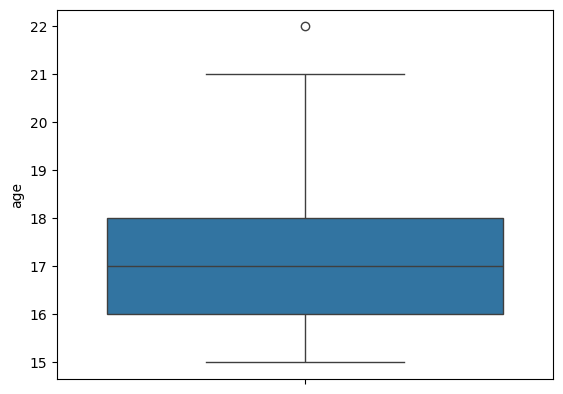

In [20]:
# Demonstrando através de um boxplot
sns.boxplot(y=df['age'])

### Distribuições

As distribuições desempenham um papel essencial na estatística, referindo-se à maneira como os dados são organizados em uma população ou conjunto de dados. Elas abrangem uma variedade de padrões e comportamentos, cada qual com suas próprias particularidades e utilidades. Entre as distribuições mais comuns estão a distribuição normal, binomial, t-Student, qui-quadrado, entre outras. Cada uma dessas distribuições possui características distintas e é aplicada em diferentes contextos na análise estatística.

- Assimetria:
É uma medida que descreve a forma como os dados estão distribuídos em torno da média.
Em uma distribuição simétrica, os valores são distribuídos igualmente em ambos os lados da média, resultando em uma assimetria de 0.
Uma distribuição é considerada assimétrica quando os valores estão mais concentrados em um lado da média do que no outro.
Existem três tipos de assimetria:
    - Assimetria positiva: ocorre quando a cauda da distribuição se estende mais para a direita do que para a esquerda da média.
    - Assimetria negativa: ocorre quando a cauda da distribuição se estende mais para a esquerda do que para a direita da média.
    - Assimetria zero: indica que a distribuição é simétrica em torno da média.

A assimetria é importante porque afeta a interpretação da distribuição dos dados e pode influenciar o uso de certos métodos estatísticos.

- Para interpretar o índice de assimetria, deve-se extrair o módulo e interpretar da seguinte forma:
    - índice de assimetria < 0,15 = distribuição simétrica
    - índice de assimetria entre 0,15 e 1,0 = distribuição assimétrica moderada
    - índice de assimetria > 1 = distribuição assimétrica forte

- Curtose:
É uma medida que descreve a forma da distribuição dos dados em relação à sua concentração em torno da média e à presença de caudas pesadas ou leves.
Uma curtose alta indica que os valores estão mais concentrados ao redor da média e as caudas da distribuição são mais pesadas do que a distribuição normal. Isso significa que há uma maior probabilidade de valores extremos ocorrerem.
Uma curtose baixa indica que os valores estão mais dispersos em relação à média e as caudas da distribuição são mais leves do que a distribuição normal.
A distribuição normal possui uma curtose de 0,263.

In [23]:
# Assimetria
assimetria = df['age'].skew()
print(f'Assimetria: {assimetria.round(2)}')

Assimetria: 0.47


In [54]:
# Curtose
curtose = df['age'].kurtosis()
print(f'Curtose: {curtose}')

Curtose: -0.001221778068738022


- Distribuição normal:
É definida por dois parâmetros: a média (μ) e o desvio padrão (σ). A média representa o valor central dos dados e o desvio padrão representa a dispersão dos dados em torno da média.

- Escore-z:

É uma medida estatística que expressa a posição de um ponto de dados em relação à média de um conjunto de dados, em termos de desvios padrão.

A fórmula para calcular o escore-Z é:

z = (x - μ) / σ

Onde x é o valor da variável, μ é a média da população e o σ é o desvio padrão da população.

O escore z é usado para comparar os valores de uma variável com a média da população e para avaliar a significância estatística de uma diferença entre dois grupos. Ela é especialmente útil quando os dados são normalmente distribuídos e quando o tamanho da amostra é grande. Determina a distância do valor em relação à média em unidades de desvio padrão

In [53]:
df['age_zscore'] = stats.zscore(df['age'])
colunas = ['age', 'age_zscore']
df[colunas].sample(5)

,age,age_zscore
119,15,-1.330954
184,16,-0.546287
327,17,0.238380
153,19,1.807713
168,16,-0.546287
